In [ ]:
import sklearn.datasets as dt
#load data 
#get all images for persons for whom there are at least 65 pictures in the dataset
faces_data = dt.fetch_lfw_people(min_faces_per_person=65)

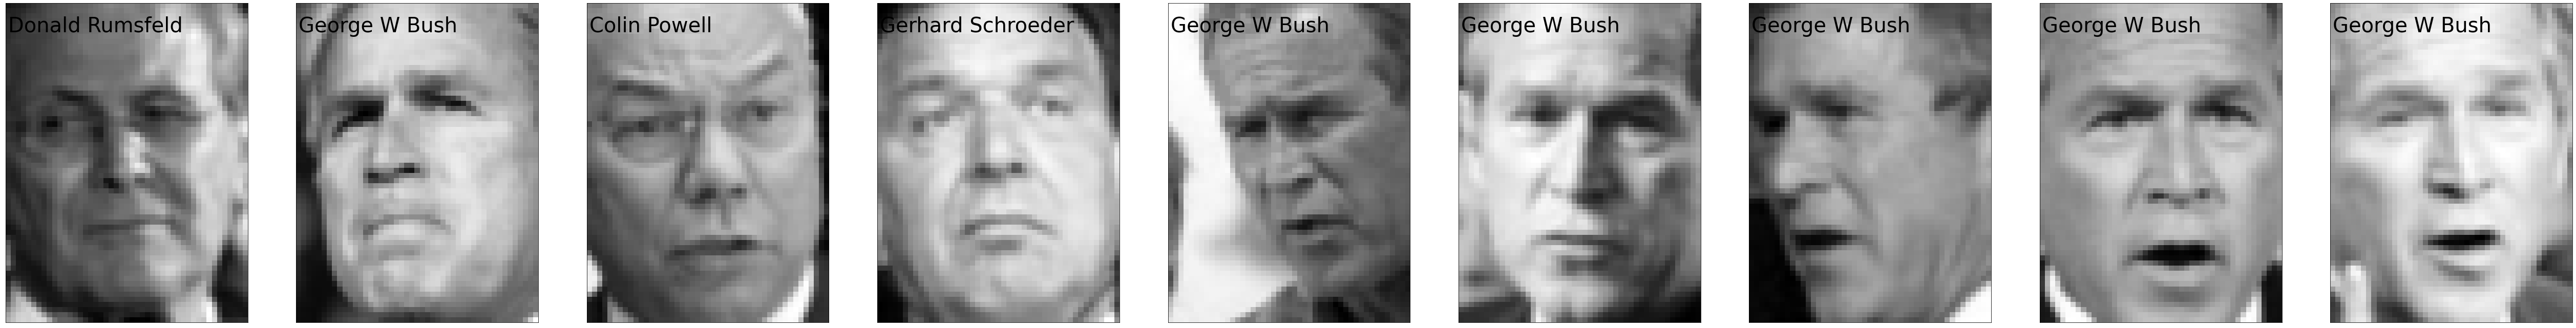

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,100))
for i in range(11,20):
  p = fig.add_subplot(1, 10, i-10+1, xticks=[], yticks = [])
  p.imshow(faces_data.images[i], cmap=plt.cm.gray)
  p.text(0, 5, faces_data.target_names[faces_data.target[i]],fontsize=40)

In [ ]:
X = faces_data.data
y = faces_data.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

(901, 2914)

In [ ]:
y_train.shape

(901,)

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg_cls = LogisticRegression(solver='liblinear')
lreg_cls.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = lreg_cls.predict(X_test)
import sklearn.metrics as mt
print(mt.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.87      0.85      0.86        68
           2       0.75      0.77      0.76        35
           3       0.84      0.89      0.87       158
           4       0.73      0.82      0.77        33
           5       0.89      0.64      0.74        25
           6       0.86      0.79      0.82        53

    accuracy                           0.83       387
   macro avg       0.83      0.79      0.80       387
weighted avg       0.83      0.83      0.83       387



In [ ]:
lreg_cls.coef_.shape

(7, 2914)

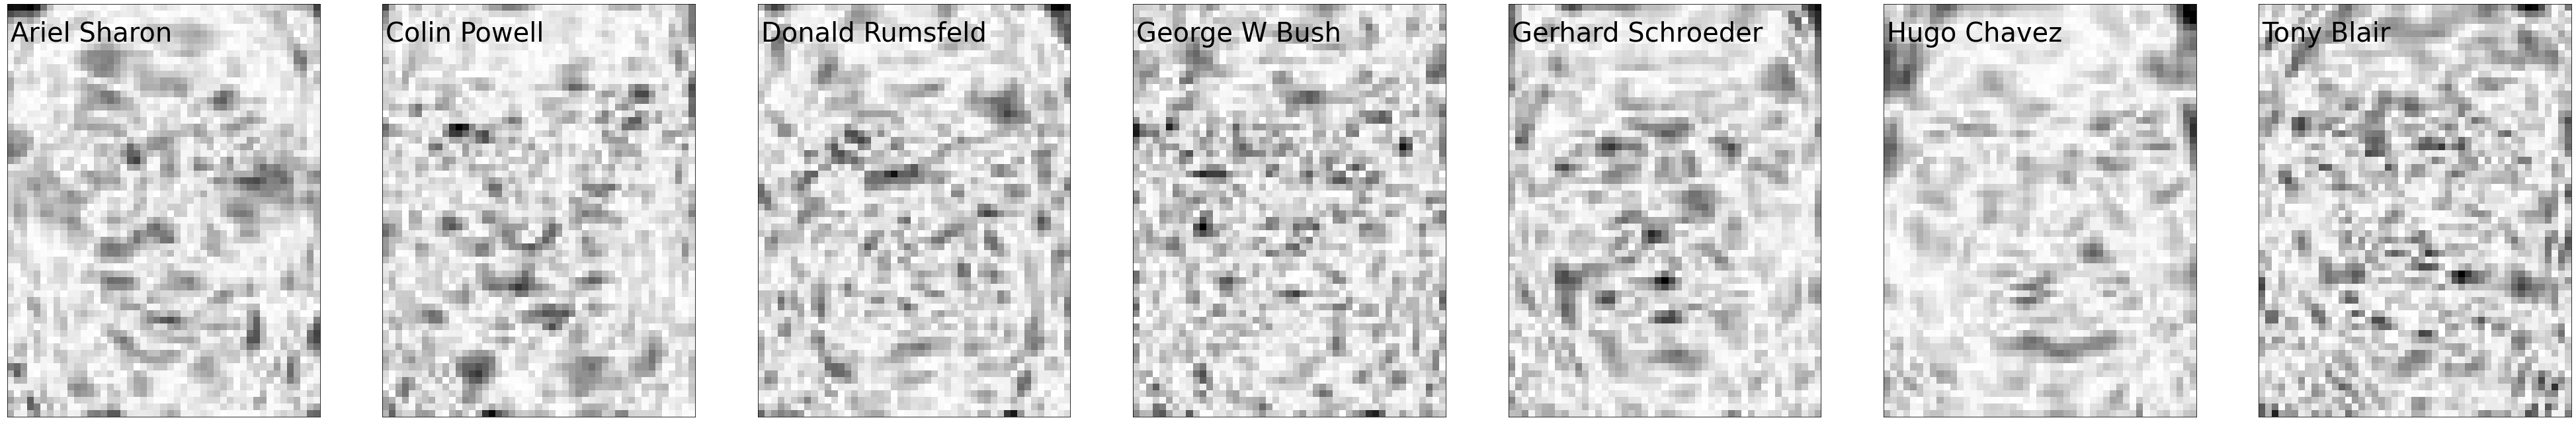

In [ ]:
fig = plt.figure(figsize=(100,100))
for i in range(0,7):
  p = fig.add_subplot(1, 10, i+1, xticks=[], yticks = [])
  p.imshow(np.abs(lreg_cls.coef_[i].reshape(62, 47)), cmap=plt.cm.gray_r)
  p.text(0, 5, faces_data.target_names[i],fontsize=40)


In [ ]:
import sklearn.datasets as dt

dataset = dt.fetch_california_housing(as_frame=True)


In [ ]:
dataset

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [ ]:
housing = dataset.frame

In [ ]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
housing.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

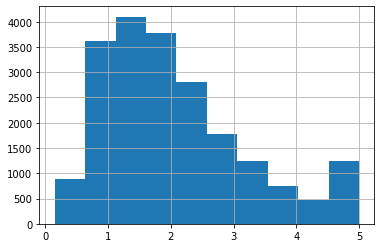

In [ ]:
housing.MedHouseVal.hist()

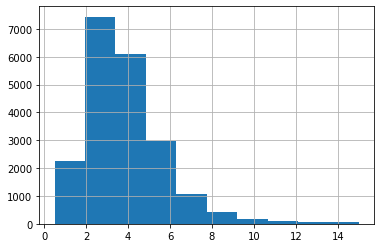

In [ ]:
housing.MedInc.hist()

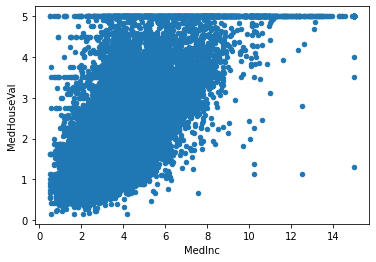

In [ ]:
housing.plot.scatter(x='MedInc',y='MedHouseVal')

In [ ]:
#split data
from sklearn.model_selection import train_test_split
train, test = train_test_split(housing, test_size = 0.2)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']], train['MedHouseVal'])


RandomForestRegressor()

In [ ]:
#measure performance using the test data
y_hat = model.predict(test[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']])
import sklearn.metrics as mt
print(mt.mean_squared_error(test['MedHouseVal'], y_hat))


0.27193748666315626


In [ ]:
#train
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(train[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']], train['MedHouseVal'])


LinearRegression()

In [ ]:
#test
y_hat = linear_model.predict(test[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']])
import sklearn.metrics as mt
print(mt.mean_squared_error(test['MedHouseVal'], y_hat))


0.5683980375762341
